### (a) For these three networks plot the degree distribution for each of the three networks that you downloaded. What are you able to conclude from these degree distributions?

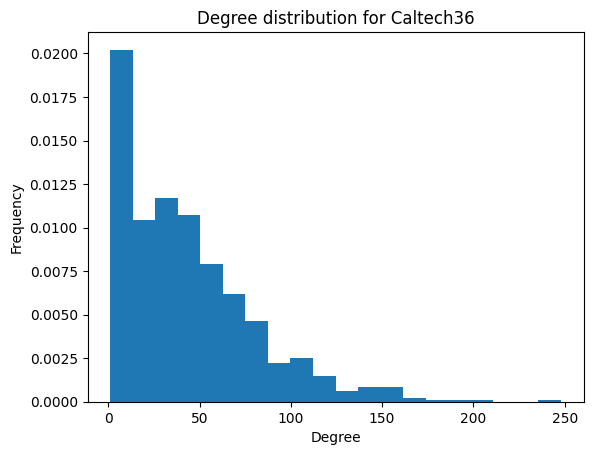

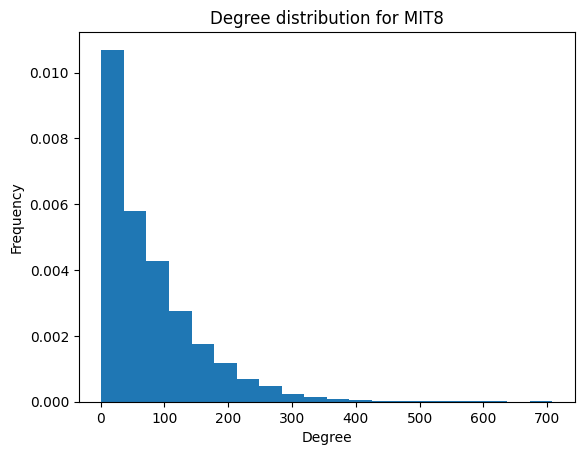

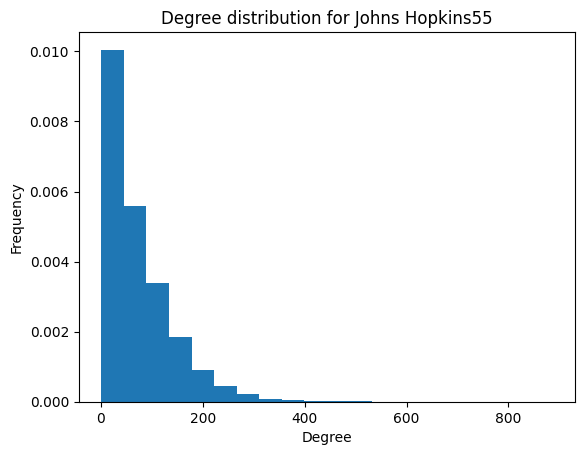

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

caltech_graph = nx.read_gml("./data/Caltech36.gml")
mit_graph = nx.read_gml("./data/MIT8.gml")
hopkins_graph = nx.read_gml("./data/Johns Hopkins55.gml")

# For these three networks plot the degree distribution for each of the three networks that you downloaded.

caltech_degree_sequence = sorted([d for n, d in caltech_graph.degree()], reverse=True)
mit_degree_sequence = sorted([d for n, d in mit_graph.degree()], reverse=True)
hopkins_degree_sequence = sorted([d for n, d in hopkins_graph.degree()], reverse=True)

# Histogram of degree distribution for Caltech36
plt.hist(caltech_degree_sequence, bins=20, density=True)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree distribution for Caltech36")
plt.show()

# Histogram of degree distribution for MIT8
plt.hist(mit_degree_sequence, bins=20, density=True)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree distribution for MIT8")
plt.show()

# Histogram of degree distribution for Johns Hopkins55
plt.hist(hopkins_degree_sequence, bins=20, density=True)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree distribution for Johns Hopkins55")
plt.show()



### (b) Compute the global clustering coefficient and mean local clustering coefficient for each of the 3 networks. In addition compute the edge density of each network. Should either of these networks be construed as sparse? Based on the density information and the clustering information what can you said about the graph topology?

In [5]:
# Compute the global clustering coefficient for each of the three networks
global_clustering_coefficient_caltech = nx.average_clustering(caltech_graph)
global_clustering_coefficient_mit = nx.average_clustering(mit_graph)
global_clustering_coefficient_hopkins = nx.average_clustering(hopkins_graph)
print("Global clustering coefficient for Caltech36: ", global_clustering_coefficient_caltech)
print("Global clustering coefficient for MIT8: ", global_clustering_coefficient_mit)
print("Global clustering coefficient for Johns Hopkins55: ", global_clustering_coefficient_hopkins)

# compute mean of local clustering coefficient for each node in the network
local_clustering_coefficient_caltech = nx.clustering(caltech_graph)
local_clustering_coefficient_mit = nx.clustering(mit_graph)
local_clustering_coefficient_hopkins = nx.clustering(hopkins_graph)

mean_local_clustering_coefficient_caltech = np.mean(list(local_clustering_coefficient_caltech.values()))
mean_local_clustering_coefficient_mit = np.mean(list(local_clustering_coefficient_mit.values()))
mean_local_clustering_coefficient_hopkins = np.mean(list(local_clustering_coefficient_hopkins.values()))

print("Mean local clustering coefficient for Caltech36: ", mean_local_clustering_coefficient_caltech)
print("Mean local clustering coefficient for MIT8: ", mean_local_clustering_coefficient_mit)
print("Mean local clustering coefficient for Johns Hopkins55: ", mean_local_clustering_coefficient_hopkins)



Global clustering coefficient for Caltech36:  0.40929439048517247
Global clustering coefficient for MIT8:  0.2712187419501315
Global clustering coefficient for Johns Hopkins55:  0.26839307371293525
Mean local clustering coefficient for Caltech36:  0.4092943904851723
Mean local clustering coefficient for MIT8:  0.271218741950132
Mean local clustering coefficient for Johns Hopkins55:  0.2683930737129351


In [6]:
# Compute the edge density of each network
edge_density_caltech = nx.density(caltech_graph)
edge_density_mit = nx.density(mit_graph)
edge_density_hopkins = nx.density(hopkins_graph)
print("Edge density for Caltech36: ", edge_density_caltech)
print("Edge density for MIT8: ", edge_density_mit)
print("Edge density for Johns Hopkins55: ", edge_density_hopkins)


Edge density for Caltech36:  0.05640442132639792
Edge density for MIT8:  0.012118119495041378
Edge density for Johns Hopkins55:  0.013910200162372396


### (c) For each network, also draw a scatter plot of the degree versus local clustering coefficient. Based on these calculations as well as your  revious ones, are you able to draw any conclusions about any similarities or differences between the tree networks? What other observations can you make?

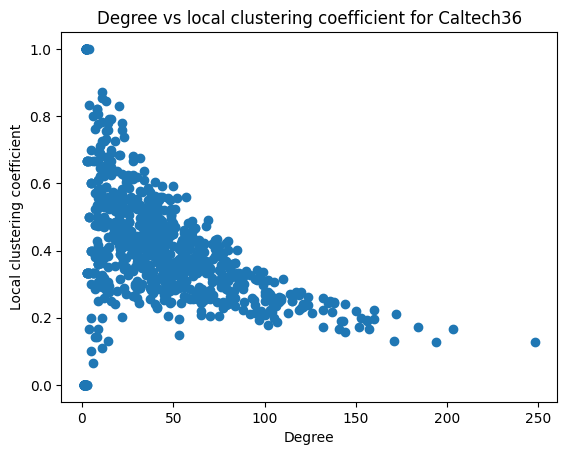

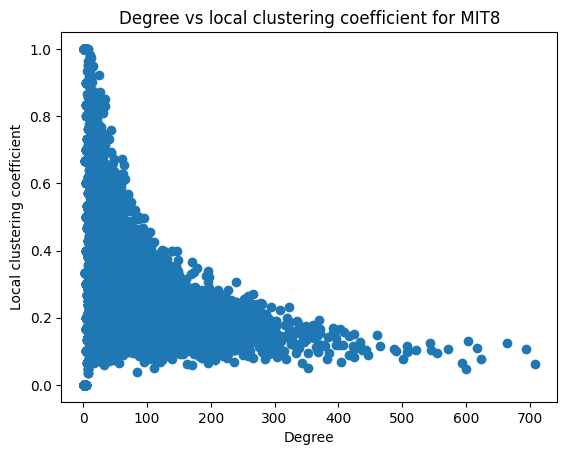

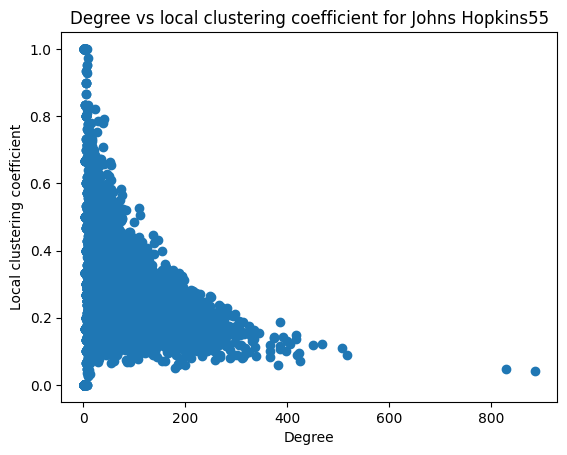

In [7]:
# For each network, draw a scatter plot of the degree versus local clustering coefficient.

# Caltech36
caltech_degree = [d for n, d in caltech_graph.degree()]
caltech_local_clustering_coefficient = list(local_clustering_coefficient_caltech.values())
plt.scatter(caltech_degree, caltech_local_clustering_coefficient)
plt.xlabel("Degree")
plt.ylabel("Local clustering coefficient")
plt.title("Degree vs local clustering coefficient for Caltech36")
plt.show()

# MIT8
mit_degree = [d for n, d in mit_graph.degree()]
mit_local_clustering_coefficient = list(local_clustering_coefficient_mit.values())
plt.scatter(mit_degree, mit_local_clustering_coefficient)
plt.xlabel("Degree")
plt.ylabel("Local clustering coefficient")
plt.title("Degree vs local clustering coefficient for MIT8")
plt.show()

# Johns Hopkins55
hopkins_degree = [d for n, d in hopkins_graph.degree()]
hopkins_local_clustering_coefficient = list(local_clustering_coefficient_hopkins.values())
plt.scatter(hopkins_degree, hopkins_local_clustering_coefficient)
plt.xlabel("Degree")
plt.ylabel("Local clustering coefficient")
plt.title("Degree vs local clustering coefficient for Johns Hopkins55")
plt.show()



## Question 3: Assortativity Analysis with the Facebook100 Dataset
In this question we expect you will compute the assortativity on a large set of graphs (if possible all the graphs).
(a) Of the FB100 networks, investigate the assortativity patterns for five vertex attributes: (i) student/faculty status, (ii) major, (iii) vertex degree, and (iiii) dorm, (iiiii) gender. Treat these networks as simple graphs in your analysis. For each vertex attribute, make a scatter plot showing the assortativity versus network size n, with log-linear axes for all 100 networks, and a histogram or density plot showing the distribution of assortativity values. In both figures, include a line indicating no assortativity. Briefly discuss the degree to which vertices do or do not exhibit assortative mixing on each attribute, and speculate about what kind of processes or tendencies in the formation of Facebook

In [3]:
import os

# Make a list of the name of files in ./data
files = ["./data/" + f for f in os.listdir("./data") if os.path.isfile(os.path.join("./data", f))]

# For the networks in files, compute the assortativity of student_fac, gender, major_index, degree and dorm.For each vertex attribute, make a scatter plot showing the assortativity versus network size n, with log-linear axes for all 100 networks, and a histogram or density plot showing the distribution of assortativity values.
size_list=[]
assortativity_fac_list=[]
assortativity_major_list=[]
assortativity_degree_list=[]
assortativity_dorm_list=[]

for file in files:
    graph = nx.read_gml(file)
    size_list.append(len(graph.nodes()))
    assortativity_fac_list.append(nx.attribute_assortativity_coefficient(graph, "student_fac"))
    assortativity_major_list.append(nx.attribute_assortativity_coefficient(graph, "major_index"))
    assortativity_degree_list.append(nx.attribute_assortativity_coefficient(graph, "degree"))
    assortativity_dorm_list.append(nx.attribute_assortativity_coefficient(graph, "dorm"))

# Scatter plot of assortativity vs network size for student_fac
plt.scatter(size_list, assortativity_fac_list)
plt.xlabel("Network size")
plt.ylabel("Assortativity")
plt.title("Assortativity vs network size for student_fac")
plt.axhline(y=0, color="red", ls="--")
plt.xscale("log")
plt.show()

# Histogram of assortativity for student_fac
plt.hist(assortativity_fac_list, bins=20, density=True)
plt.axvline(x=0, color="red", ls="--")
plt.xlabel("student_fac assortativity")
plt.ylabel("Frequency")
plt.title("DIstribution of assortativity values for student_fac")
plt.show()

# Scatter plot of assortativity vs network size for major_index
plt.scatter(size_list, assortativity_major_list)
plt.xlabel("Network size")
plt.ylabel("Assortativity")
plt.title("Assortativity vs network size for major_index")
plt.axhline(y=0, color="red", ls="--")
plt.xscale("log")
plt.show()

# Histogram of assortativity for major_index
plt.hist(assortativity_major_list, bins=20, density=True)
plt.axvline(x=0, color="red", ls="--")
plt.xlabel("major_index assortativity")
plt.ylabel("Frequency")
plt.title("Distribution of assortativity values for major_index")
plt.show()

# Scatter plot of assortativity vs network size for degree
plt.scatter(size_list, assortativity_degree_list)
plt.xlabel("Network size")
plt.ylabel("Assortativity")
plt.title("Assortativity vs network size for degree")
plt.axhline(y=0, color="red", ls="--")
plt.xscale("log")
plt.show()

# Histogram of assortativity for degree
plt.hist(assortativity_degree_list, bins=20, density=True)
plt.axvline(x=0, color="red", ls="--")
plt.xlabel("degree assortativity")
plt.ylabel("Frequency")
plt.title("Distribution of assortativity values for degree")
plt.show()

# Scatter plot of assortativity vs network size for dorm
plt.scatter(size_list, assortativity_dorm_list)
plt.xlabel("Network size")
plt.ylabel("Assortativity")
plt.title("Assortativity vs network size for dorm")
plt.axhline(y=0, color="red", ls="--")
plt.xscale("log")
plt.show()

# Histogram of assortativity for dorm
plt.hist(assortativity_dorm_list, bins=20, density=True)
plt.axvline(x=0, color="red", ls="--")
plt.xlabel("dorm assortativity")
plt.ylabel("Frequency")
plt.title("Distribution of assortativity values for dorm")
plt.show()



/usr/local/lib/python3.11/site-packages/networkx/algorithms/assortativity/correlation.py:278: RuntimeWarning: invalid value encountered in scalar divide
  r = (t - s) / (1 - s)


KeyboardInterrupt: 

# Question 4: Link prediction
In this question we expect you will compute the link prediction algorithms on a large set of graphs (> 10).
 
(b) Implement the following link prediction metrics: common neighbors, jaccard, Adamic/Adar. We use the scikit-learn2 API as an example for our implementation
of the link prediction metrics. Please use the implementation (in listing. 1) as an example. Your implementation should inherit from the class LinkPrediction
defined in listing. 1. You should implement yourself the given metrics, don’t used the ones defined in Networkx

In [6]:
from abc import ABC
from abc import abstractmethod
import networkx as nx
import numpy as np

class LinkPrediction ( ABC ) :
    def __init__ ( self , graph ) :
        """
        Constructor

        Parameters
        ----------
        graph : Networkx graph
        """
        self.graph = graph
        self.N = len ( graph )

    def neighbors ( self , v ) :
        """
        Return the neighbors list of a node

        Parameters
        ----------
        v : int
        node id

        Return
        ------
        neighbors_list : python list
        """
        neighbors_list = self.graph.neighbors(v)
        return list ( neighbors_list )

    @abstractmethod
    def fit ( self ) :
        raise NotImplementedError ( " Fit must be implemented " )
    
class CommonNeighbors ( LinkPrediction ) :
    def __init__ ( self , graph ) :
        super ( CommonNeighbors , self ) . __init__ ( graph )
        
    def fit(self):
        """
        Make numpy.array where S[i][j] = Common Neighbors that i and j have in common
        """
        self.score = np.zeros((self.N,self.N))
        for i in range(self.N):
            for j in range(i,self.N):
                if i != j:
                    tmp_score = 0
                    i_neighbors = self.neighbors(str(i))
                    j_neighbors = self.neighbors(str(j))
                    for n_i in i_neighbors:
                        for n_j in j_neighbors:
                            if n_i == n_j:
                                tmp_score += 1
                                continue

                    self.score[i][j]=tmp_score
                    self.score[j][i]=tmp_score




class Jaccard ( LinkPrediction ) :
    def __init__ ( self , graph ) :
        super ( Jaccard , self ) . __init__ ( graph )
        
    def fit(self):
        """
        Make a numpy.array A where A[i][j] = Jaccard coefficient between node i and node j
        """
        self.score = np.zeros((self.N,self.N))
        for i in range(self.N):
            for j in range(i,self.N):
                if i != j:
                    tmp_score = 0
                    i_neighbors = self.neighbors(str(i))
                    j_neighbors = self.neighbors(str(j))
                    for n_i in i_neighbors:
                        for n_j in j_neighbors:
                            if n_i == n_j:
                                tmp_score += 1
                                continue

                    if(len(i_neighbors)+len(j_neighbors)-tmp_score == 0):
                        self.score[i][j]=0
                        self.score[j][i]=0
                    else:
                        self.score[i][j]=tmp_score/(len(i_neighbors)+len(j_neighbors)-tmp_score)
                        self.score[j][i]=tmp_score/(len(i_neighbors)+len(j_neighbors)-tmp_score)





class AdamicAdar ( LinkPrediction ) :
    def __init__ ( self , graph ) :
        super ( AdamicAdar , self ) . __init__ ( graph )
        
    def fit(self):
        """
        Make a numpy.array A where A[i][j] = Adamic-Adar coefficient between node i and node j
        """
        self.score = np.zeros((self.N,self.N))
        for i in range(self.N):
            for j in range(i,self.N):
                if i != j:
                    tmp_score = 0
                    i_neighbors = self.neighbors(str(i))
                    j_neighbors = self.neighbors(str(j))
                    for n_i in i_neighbors:
                        for n_j in j_neighbors:
                            if n_i == n_j:
                                tmp_score += 1/np.log(len(self.neighbors(n_i)))
                                continue

                    self.score[i][j]=tmp_score
                    self.score[j][i]=tmp_score

(c) Evaluating a link predictor:
1. Select graph Gf b(V, E) in the Facebook100 dataset
2. randomly remove a given fraction f ∈ [0.05, 0.1, 0.15, 0.2] of edges Eremoved from the original graph Gf b.


In [71]:
caltech_graph = nx.read_gml("./data/Caltech36.gml")

def remove_random_edges(graph, f):
    """
    Remove f random edges from graph
    Parameters
    ----------
    graph : Networkx graph
    f : int
    number of edges to remove
    Return
    ------
    graph : Networkx graph
    removed_edges_list : python list
    """
    graph = graph.copy()
    N = len(graph.edges())
    number_of_edges_to_remove = round(f*N)
    random_list = np.random.choice(N, number_of_edges_to_remove, replace=False)
    edges_list=list(graph.edges(data=True))
    edges = [edges_list[i] for i in random_list]
    removed_edges_list = [(int(k[0]),int(k[1])) for k in edges ]
    for i in random_list:
        node1 = edges_list[i][0]
        node2 = edges_list[i][1]
        graph.remove_edge(node1, node2)
    return graph, removed_edges_list


# Randomly remove a given fraction f ∈ [0.05, 0.1, 0.15, 0.2] of edges Eremoved from the original graph Gfb

# f = 0.05
caltech_graph_005, removed_edges_list_005 = remove_random_edges(caltech_graph, 0.05)
# f = 0.1
caltech_graph_01, removed_edges_list_01 = remove_random_edges(caltech_graph, 0.1)
# f = 0.15
caltech_graph_015, removed_edges_list_015 = remove_random_edges(caltech_graph, 0.15)
# f = 0.2
caltech_graph_02, removed_edges_list_02 = remove_random_edges(caltech_graph, 0.2)


3. For each node pair in the graph |V |×|V |, for each node pair compute the link predictor metrics of interest p, these are the predicted ”friendship” predict.

In [66]:
################################################## for f = 0.05 ########################################################
# Common Neighbors
common_neighbors_005 = CommonNeighbors(caltech_graph_005)
common_neighbors_005.fit()
pred_score_matrix_common_neighbors_005 = common_neighbors_005.score

# Jaccard
jaccard_005 = Jaccard(caltech_graph_005)
jaccard_005.fit()
pred_score_matrix_jaccard_005 = jaccard_005.score

# Adamic-Adar
adamic_adar_005 = AdamicAdar(caltech_graph_005)
adamic_adar_005.fit()
pred_score_matrix_adamic_adar_005 = adamic_adar_005.score

################################################## for f = 0.1 ########################################################
# Common Neighbors
common_neighbors_01 = CommonNeighbors(caltech_graph_01)
common_neighbors_01.fit()
pred_score_matrix_common_neighbors_01 = common_neighbors_01.score

# Jaccard
jaccard_01 = Jaccard(caltech_graph_01)
jaccard_01.fit()
pred_score_matrix_jaccard_01 = jaccard_01.score

# Adamic-Adar
adamic_adar_01 = AdamicAdar(caltech_graph_01)
adamic_adar_01.fit()
pred_score_matrix_adamic_adar_01 = adamic_adar_01.score

################################################## for f = 0.15 ########################################################
# Common Neighbors
common_neighbors_015 = CommonNeighbors(caltech_graph_015)
common_neighbors_015.fit()
pred_score_matrix_common_neighbors_015 = common_neighbors_015.score

# Jaccard
jaccard_015 = Jaccard(caltech_graph_015)
jaccard_015.fit()
pred_score_matrix_jaccard_015 = jaccard_015.score

# Adamic-Adar
adamic_adar_015 = AdamicAdar(caltech_graph_015)
adamic_adar_015.fit()
pred_score_matrix_adamic_adar_015 = adamic_adar_015.score

################################################## for f = 0.2 ########################################################
# Common Neighbors
common_neighbors_02 = CommonNeighbors(caltech_graph_02)
common_neighbors_02.fit()
pred_score_matrix_common_neighbors_02 = common_neighbors_02.score

# Jaccard
jaccard_02 = Jaccard(caltech_graph_02)
jaccard_02.fit()
pred_score_matrix_jaccard_02 = jaccard_02.score

# Adamic-Adar
adamic_adar_02 = AdamicAdar(caltech_graph_02)
adamic_adar_02.fit()
pred_score_matrix_adamic_adar_02 = adamic_adar_02.score


4. Sort in decreasing order of confidence as a function p from the node pair Epredict and then we take the first k pairs of nodes

In [72]:
list_of_edges_and_scores_common_neighbors_sorted = []
N = len(caltech_graph_005.nodes())
for i in range(N):
    for j in range(N):
        if i != j:
            list_of_edges_and_scores_common_neighbors_sorted.append(((i,j),pred_score_matrix_common_neighbors_005[i][j]))
list_of_edges_and_scores_common_neighbors_sorted.sort(key=lambda x: x[1], reverse=True)



print(list_of_edges_and_scores_common_neighbors_sorted[0:50])
print(len(list_of_edges_and_scores_common_neighbors_sorted))


[(389, 481), (303, 440), (89, 104), (274, 453), (365, 593), (478, 729), (13, 622), (241, 591), (119, 570), (294, 341), (498, 691), (138, 233), (278, 345), (457, 509), (435, 653), (468, 581), (46, 588), (159, 715), (89, 466), (115, 250), (389, 448), (46, 314), (194, 414), (0, 510), (177, 256), (579, 594), (531, 726), (164, 375), (531, 623), (159, 356), (62, 80), (176, 466), (196, 209), (385, 610), (113, 457), (55, 665), (89, 431), (363, 536), (280, 363), (187, 251), (252, 467), (84, 759), (247, 476), (222, 690), (248, 476), (573, 622), (115, 642), (417, 464), (562, 629), (452, 727), (376, 566), (468, 620), (480, 600), (496, 734), (493, 536), (496, 569), (265, 558), (14, 531), (89, 493), (223, 282), (4, 329), (0, 251), (489, 561), (493, 671), (115, 710), (20, 219), (15, 531), (690, 725), (372, 734), (374, 562), (141, 747), (334, 671), (524, 553), (295, 321), (70, 476), (199, 696), (153, 265), (423, 764), (235, 352), (435, 725), (19, 562), (440, 637), (389, 428), (46, 264), (279, 382), (4

5. Compute the size of the intersection between the edge set of removed edges and the edge set of predicted node |Eremoved ∩ E(top@k) predict | . Then compute the top@k, recall@k and precision@k (for k = 50, 100, 200, · · · , 400) using the k best scored edges provided by link predictor algorithm (see [5] for more information). Where the top@k predictive rate is the percentage of correctly classified positive samples among the top k instances in the ranking produced by a link predictor P

In [79]:
################################################## for common neighbors 5%, 10%, 15% 20% nodes removed ########################################################
top_50_common_neighbors_005 = 0
top_50_common_neighbors_01 = 0
top_50_common_neighbors_015 = 0
top_50_common_neighbors_02 = 0
top_100_common_neighbors_005 = 0
top_100_common_neighbors_01 = 0
top_100_common_neighbors_015 = 0
top_100_common_neighbors_02 = 0
top_200_common_neighbors_005 = 0
top_200_common_neighbors_01 = 0
top_200_common_neighbors_015 = 0
top_200_common_neighbors_02 = 0
top_300_common_neighbors_005 = 0
top_300_common_neighbors_01 = 0
top_300_common_neighbors_015 = 0
top_300_common_neighbors_02 = 0
top_400_common_neighbors_005 = 0
top_400_common_neighbors_01 = 0
top_400_common_neighbors_015 = 0
top_400_common_neighbors_02 = 0

list_k = [50,100,200,300,400]
for k in list_k:
    for i in range(k):
        if list_of_edges_and_scores_common_neighbors_sorted[i][0] in removed_edges_list_005:
            top_50_common_neighbors_005 += 1
        if list_of_edges_and_scores_common_neighbors_sorted[i][0] in removed_edges_list_01:
            top_50_common_neighbors_01 += 1
        if list_of_edges_and_scores_common_neighbors_sorted[i][0] in removed_edges_list_015:
            top_50_common_neighbors_015 += 1
        if list_of_edges_and_scores_common_neighbors_sorted[i][0] in removed_edges_list_02:
            top_50_common_neighbors_02 += 1
    top_50_common_neighbors_005 = top_50_common_neighbors_005/min(50,len(removed_edges_list_005))
    top_50_common_neighbors_01 = top_50_common_neighbors_01/min(50,len(removed_edges_list_01))
    top_50_common_neighbors_015 = top_50_common_neighbors_015/min(50,len(removed_edges_list_015))
    top_50_common_neighbors_02 = top_50_common_neighbors_02/min(50,len(removed_edges_list_02))
    print("Top@"+k+" common Neighbors with 5% nodes removed: ", top_50_common_neighbors_005)
    print("Top@50 common Neighbors with 10% nodes removed: ", top_50_common_neighbors_01)
    print("Top@50 common Neighbors with 15% nodes removed: ", top_50_common_neighbors_015)
    print("Top@50 common Neighbors with 20% nodes removed: ", top_50_common_neighbors_02)





Top 50 Common Neighbors:  0.0
Top 100 Common Neighbors:  0.01
Top 200 Common Neighbors:  0.02
Top 300 Common Neighbors:  0.02
Top 400 Common Neighbors:  0.02
Top 90000 Common Neighbors:  0.8679471788715486
